In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('/content/car_preprocessed.csv')
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/car_preprocessed.csv'

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

print(X.shape)
print(y.shape)



(1728, 21)
(1728,)


In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
# Encoding categoricals + Scaling numericals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.8811960610347616
RMSE: 0.31337847622988063


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your data (assuming your CSV is already cleaned and preprocessed)
df = pd.read_csv('/content/car_preprocessed.csv')

# Features and target
X = df.drop('class', axis=1)
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict class labels
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.953757225433526

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        83
           1       0.59      0.91      0.71        11
           2       0.98      1.00      0.99       235
           3       0.83      0.88      0.86        17

    accuracy                           0.95       346
   macro avg       0.84      0.91      0.87       346
weighted avg       0.96      0.95      0.95       346



In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        83
           1       0.59      0.91      0.71        11
           2       0.98      1.00      0.99       235
           3       0.83      0.88      0.86        17

    accuracy                           0.95       346
   macro avg       0.84      0.91      0.87       346
weighted avg       0.96      0.95      0.95       346



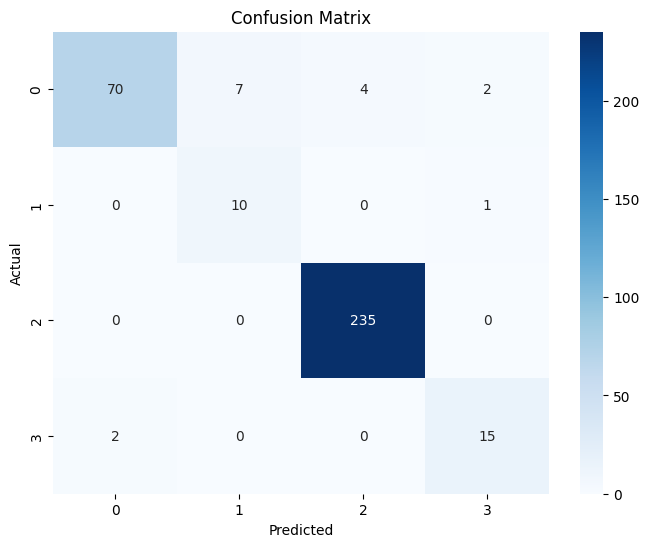

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import joblib

# Save model
joblib.dump(model, 'car_price_model.pkl')

# To load later:
# model = joblib.load('car_price_model.pkl')


['car_price_model.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy: 0.9652670956940301


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load preprocessed data
df = pd.read_csv('/content/car_preprocessed.csv')

# Features and target
X = df.drop('class', axis=1)
y = df['class']

# Categorical columns
categorical_cols = X.columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline: Preprocessing + Model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9710982658959537

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.59      0.91      0.71        11
           2       1.00      1.00      1.00       235
           3       0.89      0.94      0.91        17

    accuracy                           0.97       346
   macro avg       0.87      0.94      0.89       346
weighted avg       0.98      0.97      0.97       346


Confusion Matrix:
 [[ 75   7   0   1]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   0   0  16]]
